# <span style="color:blue"> NSL Exercise lesson 7. </span> 

## <span style="color:red"> Exercise 7.1. </span>

The aim of this lesson is simulating a system of $N$ particles in a box with periodic boundary conditions using the Metropolis algorithm.

##### 7.1.1

First of all, it is requested to print instantaneous values of potential energy per particle $U/N$ and pressure $P$ in the following thermodynamic conditions:

- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

With these instantaneous values, we can compute the internal energy and pressure autocorrelations. In order to achieve such goal the system needs to be equilibrated. In particular, it has been noted that, thanks to Metropolis algorithm fast convergence, no more than $10^3$ steps are needed in all simulations to perform such equilibration. 

Therefore, each symulation starts with an equilibration process $10^3$ steps long. Then, in order to obtain raw data all symulations are carried out using $2\cdot10^5$ steps and no blocks at all. The following script computes all the requested autocorrelations.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Autocorrelation function

def AutoCorrelation(x, tau):
    
    l = len(x)-tau
    x_t = 0
    x_tau = 0
    x_ttau = 0
    x_t2 = 0
    
    for t in range(l):
        x_t  += x[t]
        x_tau += x[t+tau]
        x_ttau += x[t]*x[t+tau]
        x_t2  += x[t]**2
        
    x_t /= l
    x_tau /= l
    x_ttau /= l
    x_t2 /= l
    
    return (x_ttau-x_t*x_tau)/(x_t2-x_t**2)

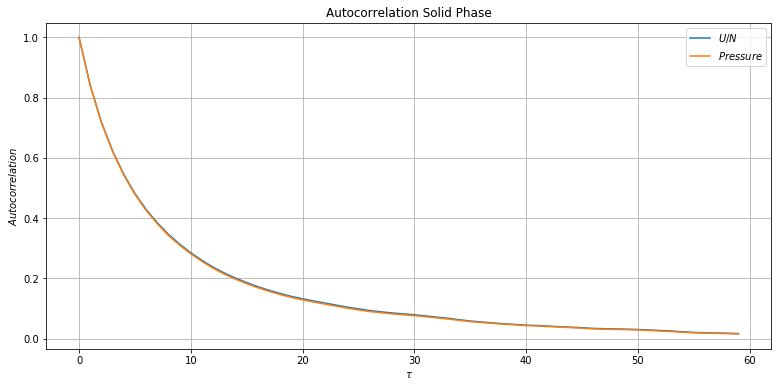

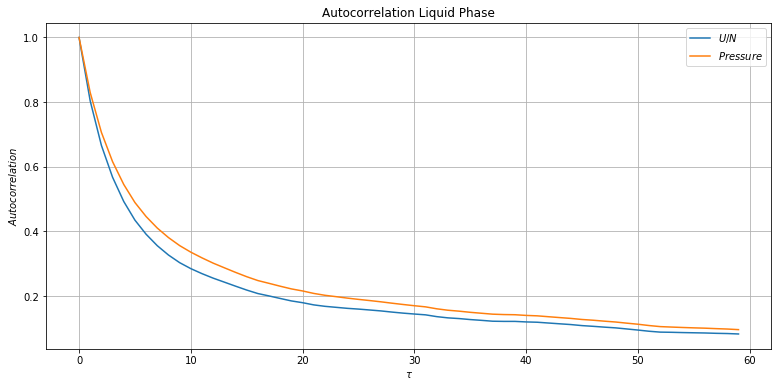

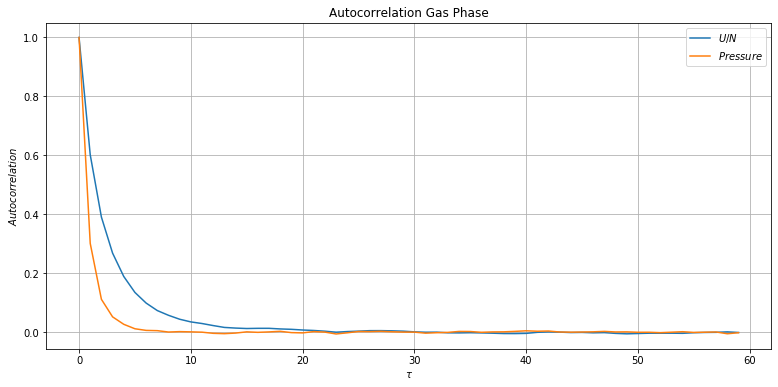

In [2]:
x, U_solid, p_solid = np.loadtxt("Datas/Solid/output.inst.0", usecols=(0,1,2), unpack='true')
U_liquid, p_liquid = np.loadtxt("Datas/Liquid/output.inst.0", usecols=(1,2), unpack='true')
U_gas, p_gas = np.loadtxt("Datas/Gas/output.inst.0", usecols=(1,2), unpack='true')

Corr_U_solid = []                                        #Note: it may take a while to
Corr_U_liquid = []                                       #compute all the autocorrelations
Corr_U_gas = []                                          #and to draw the plots
Corr_p_solid = []
Corr_p_liquid = []
Corr_p_gas = []

for tau in range(60):
    
    Corr_U_solid.append(AutoCorrelation(U_solid,tau))          #Internal energy autocorrelation
    Corr_U_liquid.append(AutoCorrelation(U_liquid,tau)) 
    Corr_U_gas.append(AutoCorrelation(U_gas,tau))
    
    Corr_p_solid.append(AutoCorrelation(p_solid,tau))          #Pressure autocorrelation
    Corr_p_liquid.append(AutoCorrelation(p_liquid,tau))
    Corr_p_gas.append(AutoCorrelation(p_gas,tau))

tau = np.arange(60)

plt.figure(1, figsize = (13, 6))
plt.title("Autocorrelation Solid Phase")
plt.xlabel(r'$\tau$')
plt.ylabel('$Autocorrelation$')
plt.plot(tau,Corr_U_solid,label="$U/N$")
plt.plot(tau,Corr_p_solid,label="$Pressure$")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (13, 6))
plt.title("Autocorrelation Liquid Phase")
plt.xlabel(r'$\tau$')
plt.ylabel('$Autocorrelation$')
plt.plot(tau,Corr_U_liquid,label="$U/N$")
plt.plot(tau,Corr_p_liquid,label="$Pressure$")
plt.grid(True)
plt.legend()

plt.figure(3, figsize = (13, 6))
plt.title("Autocorrelation Gas Phase")
plt.xlabel(r'$\tau$')
plt.ylabel('$Autocorrelation$')
plt.plot(tau,Corr_U_gas,label="$U/N$")
plt.plot(tau,Corr_p_gas,label="$Pressure$")
plt.grid(True)
plt.legend()

plt.show()

As you can see in the plots above, the autocorrelations of the solid and liquid phases tend to zero as $\tau\gtrsim60$ while for the gas phase it is safe to assume that the autocorrelation tends to zero when $\tau\gtrsim20$. 

As a consequence, knowing that the minimal number of steps in each block to obtain an autocorrelation almost null should be $N_{steps}>2\tau_{c}$ (where $\tau_{c}$ is the typical correlation time), we can say that for the solid and liquid phases $N_{steps}\approx100$, while for the gas phase $N_{steps}\approx50$ are sufficient to obtain almost uncorrelated measures. Therefore, we can expect that $N_{block-steps}=2000$ could be a safe choice.

##### 7.1.2

Then, using the same data, it is requested to make an estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, starting from $L=M/N=10$ to $L=5\times 10^3$ (where N is the number of blocks, $M=2\cdot10^5$ and therefore M is the number of 'simulations per block'). The same task is repeated for all phases, i.e. solid, liquid and gas.

Below, you can find the script used to compute the errors and all the reuired plots

In [3]:
#Function computing errors

def Error(x, L):
    
    M = len(x)
    N = int(M/L)
    
    ave = np.zeros(N)
    
    for i in range(N):
        
        blk_avg=0

        for j in range(L):
            blk_avg += x[j+L*i]
            
        ave[i] = blk_avg/L
        
    accu = 0
    accu2 = 0

    for i in range(N):
        accu += ave[i]
        accu2 += (ave[i])**2
    
    accu /= N
    accu2 /= N
        
    return np.sqrt(abs(accu2-(accu**2))/N)

##### Solid Phase

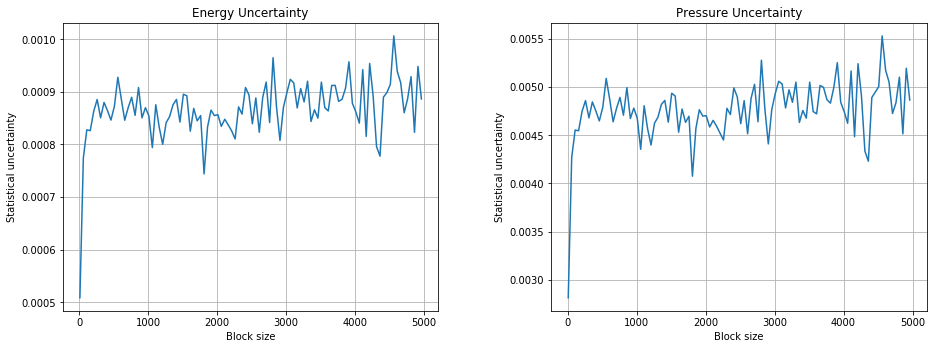

In [4]:
errU = []
errp = []

for blk_len in range(10, 5000, 50):
    errU.append(Error(U_solid, blk_len))
    errp.append(Error(p_solid, blk_len))

plt.subplot(1,2,1)
plt.plot(range(10, 5000, 50), errU, label="$U/N$")
plt.title('Energy Uncertainty')
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(10, 5000, 50), errp, label="Pressure")
plt.title('Pressure Uncertainty')
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.grid(True)

plt.subplots_adjust(left=0.2, bottom=0.2, right=2.2, top=1.2, wspace=0.3, hspace=0.4) 

plt.show()

##### Liquid Phase

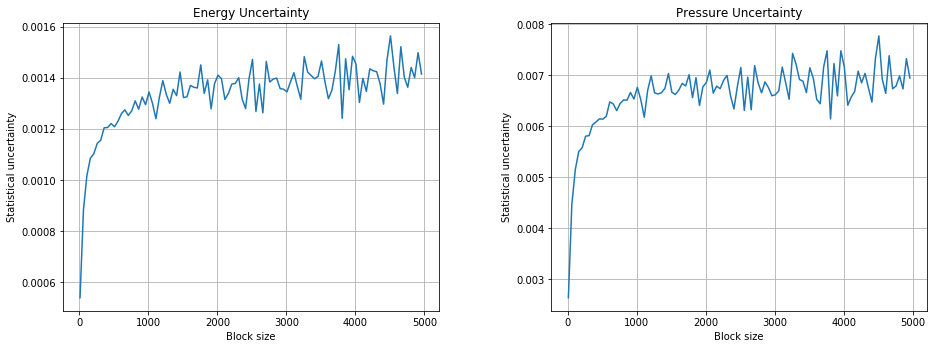

In [5]:
errU = []
errp = []

for blk_len in range(10, 5000, 50):
    errU.append(Error(U_liquid, blk_len))
    errp.append(Error(p_liquid, blk_len))

plt.subplot(1,2,1)
plt.plot(range(10, 5000, 50), errU, label="$U/N$")
plt.title('Energy Uncertainty')
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(10, 5000, 50), errp, label="Pressure")
plt.title('Pressure Uncertainty')
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.grid(True)

plt.subplots_adjust(left=0.2, bottom=0.2, right=2.2, top=1.2, wspace=0.3, hspace=0.4) 

plt.show()

##### Gas Phase

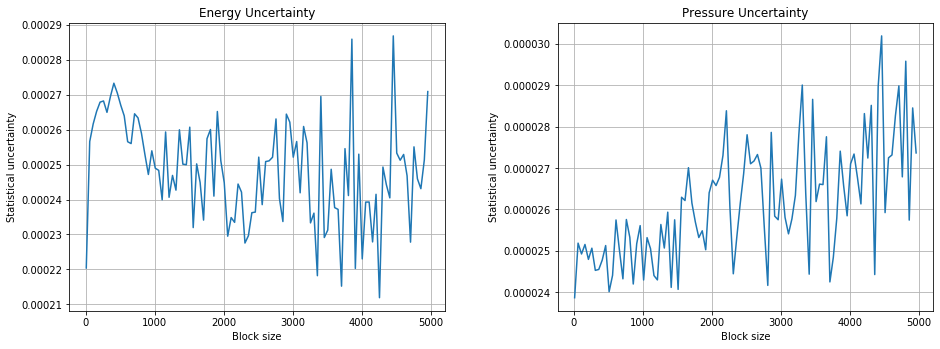

In [6]:
errU = []
errp = []

for blk_len in range(10, 5000, 50):
    errU.append(Error(U_gas, blk_len))
    errp.append(Error(p_gas, blk_len))

plt.subplot(1,2,1)
plt.plot(range(10, 5000, 50), errU, label="$U/N$")
plt.title('Energy Uncertainty')
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(10, 5000, 50), errp, label="Pressure")
plt.title('Pressure Uncertainty')
plt.xlabel('Block size')
plt.ylabel('Statistical uncertainty')
plt.grid(True)

plt.subplots_adjust(left=0.2, bottom=0.2, right=2.2, top=1.2, wspace=0.3, hspace=0.4) 

plt.show()

In general, we can say that all the plots show the same behaviour, meaning that after a specific number of steps the uncertainties tend to increase and stabilize around costant values. However, small fluctuations in the neighborhood of these values are unavoidable. This is particularly true for the gas phase, where such fluctuations are more relevant than in the other phases, even though the magnitude scale of the uncertainties is far smaller.

## <span style="color:red"> Exercise 7.4. </span>

After having added the possibility to calculate the radial distribution function $g(r)$ in both Montecarlo and Molecular Dynamics NVE codes (see lecture 4 for further details), it is requested to compute the average values and uncertainties of the potential energy per particle $U/N$, the pressure $P$ and the radial distribution function $g(r)$ of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in SI units in the following conditions:

1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Below you can find the plots of all the thermodynamical variables. In particular, you can see a comparison between the radial distribution $g(r)_{Montecarlo}$ and the radial distribution $g(r)_{Molecular Dynamics NVE}$. 

In [7]:
#Physical constants needed for conversions

from scipy.constants import Boltzmann as kb
from scipy.constants import  atomic_mass as amu

sigma = 0.34e-9
epsilon = 120.*kb
m = 39.948*amu

##### Solid phase

In this case, the equilibrium configuration is obtained starting from the provided fcc configuration.

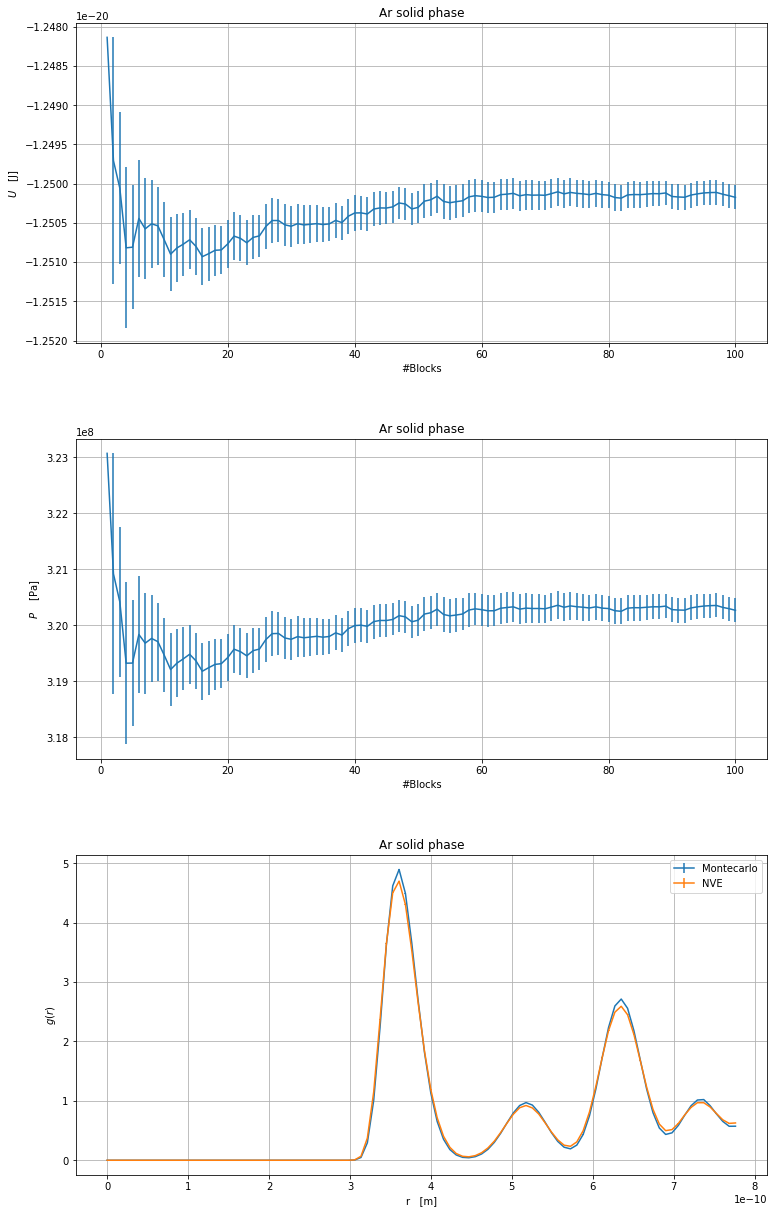

In [8]:
#Loading datas & plots

x, epot, err_epot = np.loadtxt("Datas/Solid/output.epot.0", usecols=(0,2,3), unpack=True)
epot*=epsilon
err_epot*=epsilon

press, err_press = np.loadtxt("Datas/Solid/output.pres.0", usecols=(2,3), unpack=True)
press*= (epsilon/(sigma**3))
err_press*=(epsilon/(sigma**3))

r, gofr, err_gofr = np.loadtxt("Datas/Solid/output.gave.0", usecols=(1,2,3), unpack=True)
gofr_NVE, err_gofr_NVE = np.loadtxt("Datas/Solid/output_g.out", usecols=(2,3), unpack=True)
r*=sigma

plt.subplot(3,1,1)               #Potential energy
plt.errorbar(x,epot,err_epot)
plt.title("Ar solid phase")
plt.xlabel("#Blocks")
plt.ylabel("$U$   [J]")
plt.grid(True)

plt.subplot(3,1,2)               #Pressure
plt.errorbar(x,press,err_press)
plt.title("Ar solid phase")
plt.xlabel("#Blocks")
plt.ylabel("$P$    [Pa]")
plt.grid(True)

plt.subplot(3,1,3)               #Radial distribution g(r)
plt.errorbar(r, gofr, err_gofr, label="Montecarlo")
plt.errorbar(r, gofr_NVE, err_gofr_NVE, label="NVE")
plt.title("Ar solid phase")
plt.xlabel("r   [m]")
plt.ylabel("$g(r)$")
plt.grid(True)
plt.legend()
       
plt.subplots_adjust(left=-0.2, bottom=-1.5, right=1.4, top=2.5, wspace=0.3, hspace=0.3) 

plt.show()

##### Liquid Phase

In this case, the equilibrium configuration is obtained starting from the last configuration obtained simulating the solid phase.

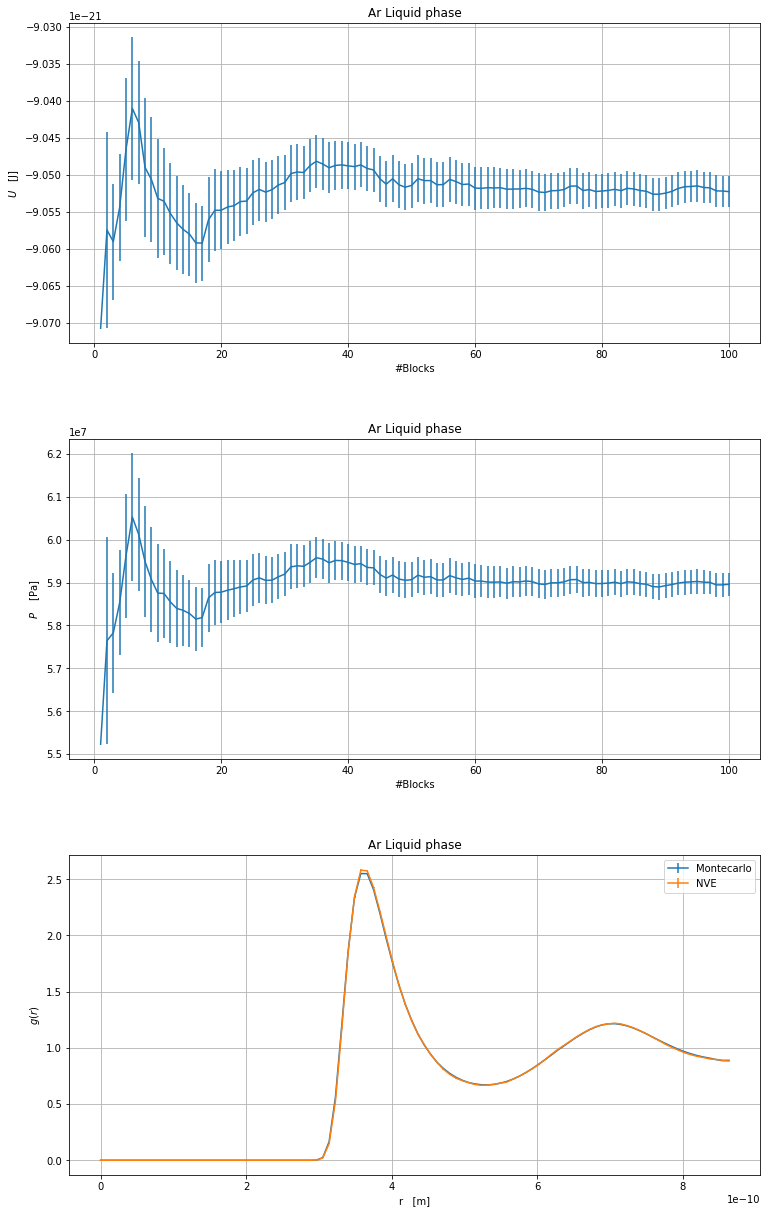

In [9]:
#Loading datas & plots

x, epot, err_epot = np.loadtxt("Datas/Liquid/output.epot.0", usecols=(0,2,3), unpack=True)
epot*=epsilon
err_epot*=epsilon

press, err_press = np.loadtxt("Datas/Liquid/output.pres.0", usecols=(2,3), unpack=True)
press*= (epsilon/(sigma**3))
err_press*=(epsilon/(sigma**3))

r, gofr, err_gofr = np.loadtxt("Datas/Liquid/output.gave.0", usecols=(1,2,3), unpack=True)
gofr_NVE, err_gofr_NVE = np.loadtxt("Datas/Liquid/output_g.out", usecols=(2,3), unpack=True)
r*=sigma

plt.subplot(3,1,1)               #Potential energy
plt.errorbar(x,epot,err_epot)
plt.title("Ar Liquid phase")
plt.xlabel("#Blocks")
plt.ylabel("$U$   [J]")
plt.grid(True)

plt.subplot(3,1,2)               #Pressure
plt.errorbar(x,press,err_press)
plt.title("Ar Liquid phase")
plt.xlabel("#Blocks")
plt.ylabel("$P$    [Pa]")
plt.grid(True)

plt.subplot(3,1,3)               #Radial distribution g(r)
plt.errorbar(r, gofr, err_gofr, label="Montecarlo")
plt.errorbar(r, gofr_NVE, err_gofr_NVE, label="NVE")
plt.title("Ar Liquid phase")
plt.xlabel("r   [m]")
plt.ylabel("$g(r)$")
plt.grid(True) 
plt.legend()
       
plt.subplots_adjust(left=-0.2, bottom=-1.5, right=1.4, top=2.5, wspace=0.3, hspace=0.3) 

plt.show()

##### Gas Phase

Again, in this case, the equilibrium configuration is obtained starting from the last configuration obtained simulating the liquid phase.

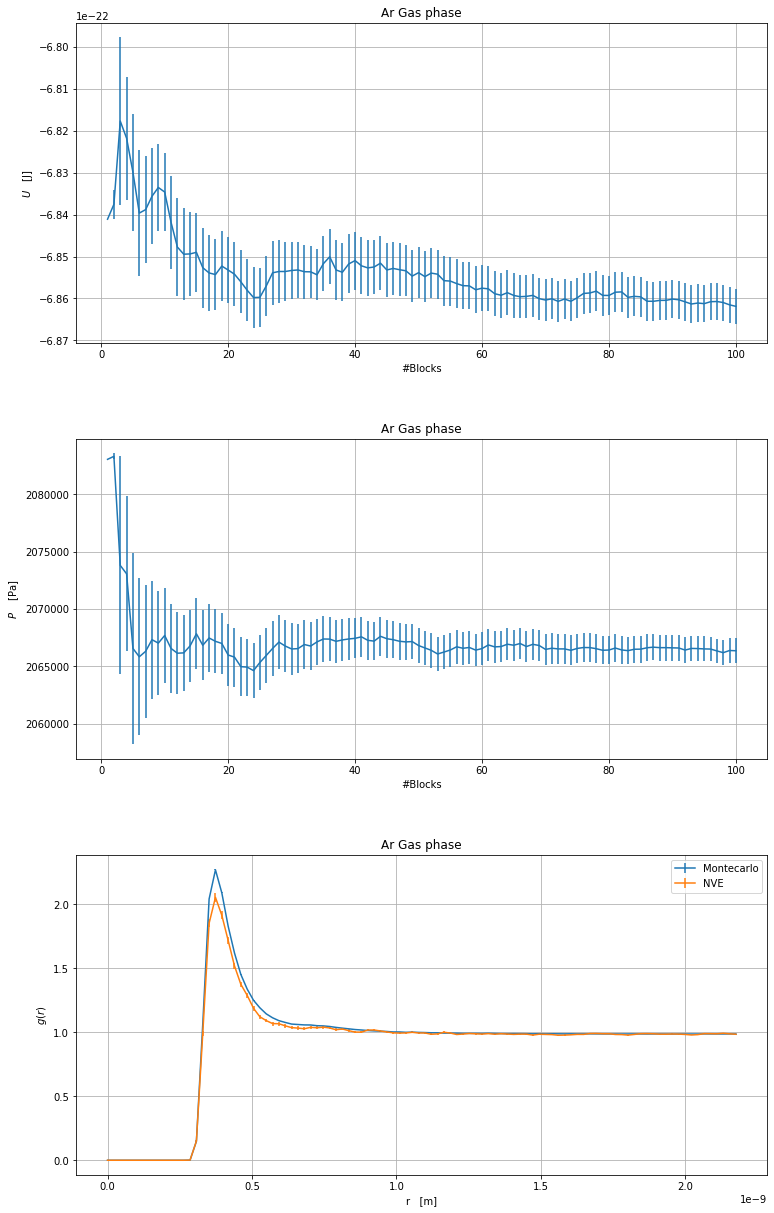

In [10]:
#Loading datas & plots

x, epot, err_epot = np.loadtxt("Datas/Gas/output.epot.0", usecols=(0,2,3), unpack=True)
epot*=epsilon
err_epot*=epsilon

press, err_press = np.loadtxt("Datas/Gas/output.pres.0", usecols=(2,3), unpack=True)
press*= (epsilon/(sigma**3))
err_press*=(epsilon/(sigma**3))

r, gofr, err_gofr = np.loadtxt("Datas/Gas/output.gave.0", usecols=(1,2,3), unpack=True)
gofr_NVE, err_gofr_NVE = np.loadtxt("Datas/Gas/output_g.out", usecols=(2,3), unpack=True)
r*=sigma

plt.subplot(3,1,1)               #Potential energy
plt.errorbar(x,epot,err_epot)
plt.title("Ar Gas phase")
plt.xlabel("#Blocks")
plt.ylabel("$U$   [J]")
plt.grid(True)

plt.subplot(3,1,2)               #Pressure
plt.errorbar(x,press,err_press)
plt.title("Ar Gas phase")
plt.xlabel("#Blocks")
plt.ylabel("$P$    [Pa]")
plt.grid(True)

plt.subplot(3,1,3)               #Radial distribution g(r)
plt.errorbar(r, gofr, err_gofr, label="Montecarlo")
plt.errorbar(r, gofr_NVE, err_gofr_NVE, label="NVE")
plt.title("Ar Gas phase")
plt.xlabel("r   [m]")
plt.ylabel("$g(r)$")
plt.grid(True)
plt.legend()
       
plt.subplots_adjust(left=-0.2, bottom=-1.5, right=1.4, top=2.5, wspace=0.3, hspace=0.3) 

plt.show()

In general, from all the plots above, you can see that the radial distribution g(r) trends obtained via Montecarlo and NVE algorithm are certainly compatible within $1\sigma$ for solid and liquid phases, while for the gaseous one they are compatible within more than $2\sigma$ for values of the radius $r<1$.